In [1]:
#pip install squarify
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import squarify

In [2]:
df_2017 = pd.read_csv('Parking_2017.csv', low_memory=False)
df_2017['ticket count'] = df_2017.index

In [7]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 44)
pd.set_option("display.min_rows", 44)
pd.set_option('display.expand_frame_repr', True)

In [4]:
df_2017.shape

(10803028, 44)

In [5]:
df_2017.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,ticket count
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0143A,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN,0
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0400P,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN,1
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0233P,NaN,BX,NaN,NaN,SB WEBSTER AVE @ E 1,94TH ST,0,1111,C,T,NaN,NaN,NaN,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN,2
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,34330,34350,20180630,14.0,14,14,359594,T102,J,1120A,NaN,NY,O,330,7th Ave,NaN,0,408,l2,NaN,Y,0700A,0700P,WH,NaN,2007,NaN,0,04,47-Double PKG-Midtown,NaN,NaN,NaN,3
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,34310,34330,20170228,13.0,13,13,364832,T102,M,0555P,NaN,NY,F,799,6th Ave,NaN,0,408,h1,NaN,Y,0700A,0700P,WHITE,NaN,2007,NaN,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN,4


In [6]:
df_2017.drop('Summons Number', axis=1, inplace=True)
df_2017.drop('Street Code1', axis=1, inplace=True)
df_2017.drop('Street Code2', axis=1, inplace=True)
df_2017.drop('Street Code3', axis=1, inplace=True)
df_2017.drop('Violation Location', axis=1, inplace=True)
df_2017.drop('Issuer Command', axis=1, inplace=True)
df_2017.drop('Time First Observed', axis=1, inplace=True)
df_2017.drop('Violation In Front Of Or Opposite', axis=1, inplace=True)
df_2017.drop('House Number', axis=1, inplace=True)
df_2017.drop('Intersecting Street', axis=1, inplace=True)
df_2017.drop('Date First Observed', axis=1, inplace=True)
df_2017.drop('Law Section', axis=1, inplace=True)
df_2017.drop('Sub Division', axis=1, inplace=True)
df_2017.drop('Violation Legal Code', axis=1, inplace=True)
df_2017.drop('Days Parking In Effect    ', axis=1, inplace=True)
df_2017.drop('From Hours In Effect', axis=1, inplace=True)
df_2017.drop('To Hours In Effect', axis=1, inplace=True)
df_2017.drop('Unregistered Vehicle?', axis=1, inplace=True)
df_2017.drop('No Standing or Stopping Violation', axis=1, inplace=True)
df_2017.drop('Hydrant Violation', axis=1, inplace=True)
df_2017.drop('Double Parking Violation', axis=1, inplace=True)

In [7]:
df_2017['issue_date_dt']  = pd.to_datetime(df_2017['Issue Date'], format='%m/%d/%Y', errors ='coerce')
df_2017['month/y'] = df_2017['issue_date_dt'].dt.strftime('%y/%m')
df_2017['issue_day'] = df_2017['issue_date_dt'].dt.strftime('%d')

df_2017.drop(df_2017.loc[(df_2017['issue_date_dt'] <= '2016-01-01')].index, inplace =True)
df_2017.drop(df_2017.loc[(df_2017['issue_date_dt'] >= '2018-01-01')].index, inplace =True)


In [8]:
# Convert 'ViolationTime' column to stirng and convert values not containing 'A/P' (ambiguous) to null
df_2017['Violation Time'] = df_2017['Violation Time'].astype('str')
ViolationTime_ambiguous = df_2017[~df_2017['Violation Time'].str.contains('P|A')]['Violation Time'].unique().tolist()
df_2017[df_2017['Violation Time'].isin(ViolationTime_ambiguous)] = None

In [9]:
df_2017.shape[0]

10800294

In [8]:
datapoints = df_2017.shape[0]
d = {'Nan Entry': df_2017.isnull().any(),
     '% Filled  Entry': ((df_2017.notnull().sum()) / datapoints) * 100,
    'Unique Entry': df_2017.nunique(axis = 0),
     '% Unique Entries': (df_2017.nunique(axis = 0) / datapoints) * 100}
pd.DataFrame(data = d, index = df_2017.columns.values)

,Nan Entry,% Filled Entry,Unique Entry,% Unique Entries
Summons Number,False,100.000000,10803028,100.000000
Plate ID,True,99.993261,3059045,28.316552
Registration State,False,100.000000,67,0.000620
Plate Type,False,100.000000,86,0.000796
Issue Date,False,100.000000,2063,0.019096
Violation Code,False,100.000000,100,0.000926
Vehicle Body Type,True,99.604639,1847,0.017097
Vehicle Make,True,99.323801,5702,0.052781
Issuing Agency,False,100.000000,17,0.000157
Street Code1,False,100.000000,6561,0.060733


In [66]:
# df_2017.head() 
# df_2017.dtypes
# 10800294
# ['ticket count'].count()[lambda x: x >= 500]
# df_2017['Vehicle Color'].value_counts(sort=True, dropna=True)

df_2017['Vehicle Color'] = df_2017['Vehicle Color'].replace({ 'LT/': 'LIGHT', 'DK/': 'DARK', 'DKG': 'GREY', 'DKB': 'BROWN', 'GN': 'GREEN', 'BLW': 'BLUE', 'BRO': 'BROWN','GRN': 'GREEN', 'DKGY': 'GREY', 'BN': 'BROWN', 'BROW': 'BROWN', ' PURPLE': 'PURPLE', 'BRN': 'BROWN', 'LTGY': 'GREY', 'PR': 'PURPLE', 'PURPL': 'PURPLE', 'SL': 'SILVER', 'SIL': 'SILVER', 'BLU': 'BLUE', 'WHT': 'WHITE', 'WHI': 'WHITE', 'LTG': 'GREY', 'WT': 'WHITE', 'MR' : 'MAROON', 'OR': 'ORANGE', 'ORANG': 'ORANGE', 'WI': 'WHITE', 'GY': 'GREY', 'WH': 'WHITE', 'BK': 'BLACK', 'BLK': 'BLACK', 'TN': 'TAN', 'BR': 'BROWN', 'GRY': 'GREY', 'GL': 'GOLD', 'BL': 'BLUE', 'RD': 'RED', 'SILVE': 'SILVER', 'GR': 'GREEN', 'YW': 'YELLOW', 'GRAY': 'GREY', 'YELLO': 'YELLOW'})
total = df_2017['Vehicle Color'].value_counts(sort=True, dropna=True)[lambda x: x >= 2500].sum() # 10572695
df_2017['Vehicle Color'].value_counts(sort=True, dropna=True)[lambda x: x >= 2500] 

WHITE     3008429
GREY      2256899
BLACK     2225181
BLUE       864222
RED        614309
BROWN      374593
GREEN      317162
SILVER     298882
TAN        178818
YELLOW     133750
OTHER      106853
GOLD        95888
MAROON      36216
ORANGE      31201
PURPLE      12090
LIGHT        9243
DARK         8958
Name: Vehicle Color, dtype: int64

In [70]:
df_2017.groupby(['Vehicle Color', 'Vehicle Make']).count()['ticket count'].sort_values(ascending=False).reset_index().head(5)
# df_2017.groupby(['Vehicle Make']).count()['ticket count'].sort_values(ascending=False).reset_index().head(5)

,Vehicle Color,Vehicle Make,ticket count
0,WHITE,FORD,624738
1,GREY,TOYOT,367514
2,GREY,HONDA,344701
3,BLACK,TOYOT,306143
4,WHITE,CHEVR,301147


In [64]:
# df_2017.groupby(['Vehicle Make', 'Vehicle Body Type']).count()['ticket count'].sort_values(ascending=False).reset_index().head(5)
df_2017.groupby(['Vehicle Body Type']).count()['ticket count'].sort_values(ascending=False).reset_index().head(5)

,Vehicle Body Type,ticket count
0,SUBN,3719021
1,4DSD,3082020
2,VAN,1411598
3,DELV,687048
4,SDN,437131


In [15]:
df_2017.groupby(['Violation County']).count()['ticket count'].sort_values(ascending=False).reset_index().head(10)

,Violation County,ticket count
0,NY,3432219
1,K,2218073
2,Q,1838523
3,BX,1361984
4,BK,880657
5,QN,674245
6,ST,137542
7,R,121364
8,MN,96298
9,BRONX,2


In [71]:
df_2017.groupby(['Violation Description']).count()['ticket count'].sort_values(ascending=False).reset_index().head(10)

,Violation Description,ticket count
0,PHTO SCHOOL ZN SPEED VIOLATION,1400614
1,21-No Parking (street clean),1230545
2,38-Failure to Display Muni Rec,1056018
3,14-No Standing,811080
4,37-Expired Muni Meter,593902
5,FAILURE TO STOP AT RED LIGHT,516388
6,20A-No Parking (Non-COM),495591
7,71A-Insp Sticker Expired (NYS),454867
8,40-Fire Hydrant,422674
9,19-No Stand (bus stop),228931


In [56]:
df_2017.groupby(['Violation Description', 'Vehicle Body Type']).count()['ticket count'].sort_values(ascending=False).reset_index().head(20)
# df_2017.groupby(['Violation Description']).count()['ticket count'].sort_values(ascending=False).reset_index()


,Violation Description,Vehicle Body Type,ticket count
0,PHTO SCHOOL ZN SPEED VIOLATION,SUBN,570305
1,21-No Parking (street clean),4DSD,524314
2,21-No Parking (street clean),SUBN,517429
3,PHTO SCHOOL ZN SPEED VIOLATION,4DSD,491113
4,38-Failure to Display Muni Rec,SUBN,416037
5,38-Failure to Display Muni Rec,4DSD,354234
6,37-Expired Muni Meter,SUBN,260636
7,20A-No Parking (Non-COM),SUBN,231222
8,20A-No Parking (Non-COM),4DSD,217434
9,71A-Insp Sticker Expired (NYS),SUBN,196869


In [34]:
df_2017.dtypes

Plate ID                           object
Registration State                 object
Plate Type                         object
Issue Date                         object
Violation Code                    float64
Vehicle Body Type                  object
Vehicle Make                       object
Issuing Agency                     object
Vehicle Expiration Date           float64
Violation Precinct                float64
Issuer Precinct                   float64
Issuer Code                       float64
Issuer Squad                       object
Violation Time                     object
Violation County                   object
Street Name                        object
Vehicle Color                      object
Vehicle Year                      float64
Meter Number                       object
Feet From Curb                    float64
Violation Post Code                object
Violation Description              object
ticket count                      float64
issue_date_dt              datetim

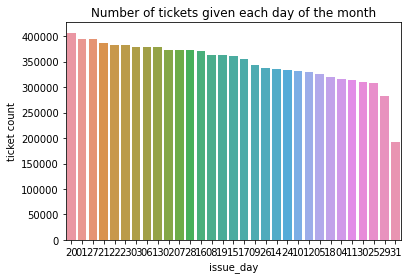

In [83]:
# Issuing day vs tickets #
iagency_plot = df_2017.groupby(['issue_day']).count()['ticket count'].sort_values(ascending=False).reset_index()
#plot
sns.barplot(x = 'issue_day', y = 'ticket count', data = iagency_plot).set(title='Number of tickets given each day of the month');

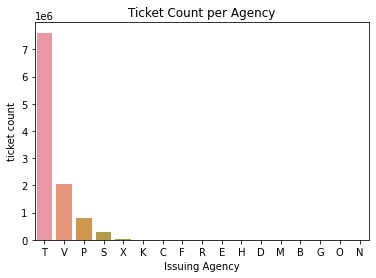

In [84]:
# Issuing agency vs Summons dataframe
iagency_plot = df_2017.groupby(['Issuing Agency']).count()['ticket count'].sort_values(ascending=False).reset_index()
#plot
sns.barplot(x = 'Issuing Agency', y = 'ticket count', data = iagency_plot).set(title='Ticket Count per Agency');

In [77]:
# df_2017.plot.pie(y='index', figsize=(5,5))

# plt.show()

# df_2017.groupby(['issue_day']).sum().plot(kind='pie', y='ticket count', autopct='%1.0f%%', legend= False, title='tickets per day');
df_2017['ticket count'].count()

10800214

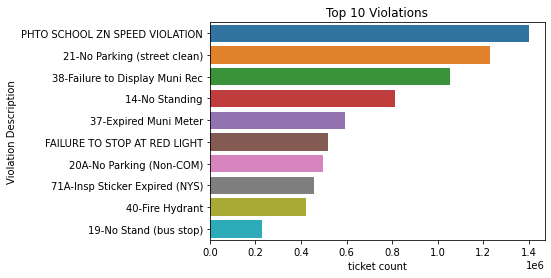

In [78]:
# Top 10 Violations dataframe
top_20_violations = df_2017.loc[:,['Violation Description','ticket count']].groupby(['Violation Description']).count()['ticket count'].reset_index().sort_values('ticket count',ascending = False).head(10)
# Bar plot
sns.barplot(x = 'ticket count', y = 'Violation Description', data = top_20_violations).set(title='Top 10 Violations');

In [82]:
df_2017.groupby(['Violation Description', 'Vehicle Make']).count()['ticket count'].sort_values(ascending=False).reset_index().head(10)

,Violation Description,Vehicle Make,ticket count
0,PHTO SCHOOL ZN SPEED VIOLATION,TOYOT,199270
1,PHTO SCHOOL ZN SPEED VIOLATION,HONDA,170364
2,21-No Parking (street clean),TOYOT,167709
3,PHTO SCHOOL ZN SPEED VIOLATION,NISSA,165192
4,21-No Parking (street clean),HONDA,161152
5,38-Failure to Display Muni Rec,FORD,132047
6,PHTO SCHOOL ZN SPEED VIOLATION,FORD,128869
7,21-No Parking (street clean),NISSA,122757
8,21-No Parking (street clean),FORD,118501
9,38-Failure to Display Muni Rec,TOYOT,117013


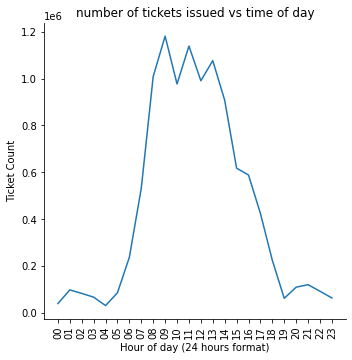

In [21]:
# Concatenate 'M' to 'ViolationTime' column 
df_2017['Violation Time'] = df_2017['Violation Time'] + 'M'
# Convert the column to datetime
df_2017['Violation Time'] = pd.to_datetime(df_2017['Violation Time'],format='%I%M%p',errors='coerce')
# Extract hour from the 'ViolationTime' column 
df_2017['Violation Time'] = df_2017['Violation Time'].dt.strftime('%H')
# Prepare dataframe for time series plot
time_series_summons = df_2017.groupby(['Violation Time']).count()['ticket count'].reset_index().sort_values(['Violation Time'])

# Time series plot using seaborn
sns.relplot(x = "Violation Time", y = "ticket count", data = time_series_summons, kind = "line", ci = None)
plt.xlabel("Hour of day (24 hours format)")
plt.xticks(rotation = 90)
plt.ylabel("Ticket Count")
plt.title("number of tickets issued vs time of day")
plt.show()


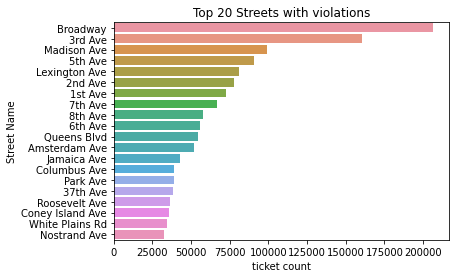

In [22]:
# Top 10 Streets with violations
top_20_violations = df_2017.loc[:,['Street Name','ticket count']].groupby(['Street Name']).count()['ticket count'].reset_index().sort_values('ticket count',ascending = False).head(20)
# Bar plot
sns.barplot(x = 'ticket count', y = 'Street Name', data = top_20_violations).set(title='Top 20 Streets with violations');

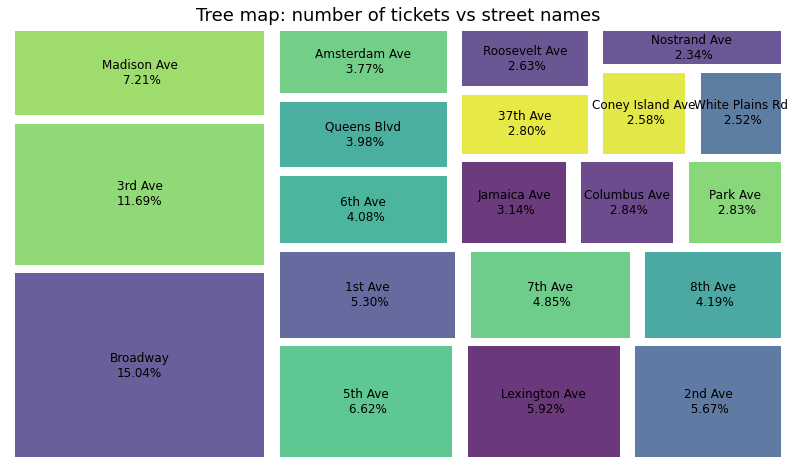

In [23]:
#First you need to intall squarify by using pip install squarify and then import squarify to jupyter lab


#pip install squarify
#import squarify


top_20 = df_2017.loc[:,['Street Name','ticket count']].groupby(['Street Name']).count()['ticket count'].reset_index().sort_values('ticket count', ascending = False).head(20)

perc = [str('{:5.2f}'.format(i/top_20['ticket count'].sum()*100)) + "%" for i in top_20['ticket count']]

lbl = [el[0] + "\n" + el[1] for el in zip(top_20['Street Name'], perc)]
plt.figure(figsize=(14,8))
title = "Tree map: number of tickets vs street names"
plt.title(title, size=18)
squarify.plot(top_20['ticket count'], label=lbl, alpha=0.8, pad=True, text_kwargs={'color':'black', 'size':12})
plt.axis('off')
plt.show();

In [24]:


# df_2017['Violation Description'].unique()
print(df_2017['Violation Description'].value_counts(sort=True, dropna=True))

PHTO SCHOOL ZN SPEED VIOLATION    1400614
21-No Parking (street clean)      1230545
38-Failure to Display Muni Rec    1056018
14-No Standing                     811080
37-Expired Muni Meter              593902
FAILURE TO STOP AT RED LIGHT       516388
20A-No Parking (Non-COM)           495591
71A-Insp Sticker Expired (NYS)     454867
40-Fire Hydrant                    422674
19-No Stand (bus stop)             228931
70A-Reg. Sticker Expired (NYS)     221522
46B-Double Parking (Com-100Ft)     209220
69-Failure to Disp Muni Recpt      183287
46A-Double Parking (Non-COM)       166830
BUS LANE VIOLATION                 145642
31-No Stand (Com. Mtr. Zone)       144988
47-Double PKG-Midtown              108759
16A-No Std (Com Veh) Non-COM        84527
48-Bike Lane                        75237
16-No Std (Com Veh) Com Plate       71417
50-Crosswalk                        70950
                                   ...   
79A-Bus Layover (W/ Pass)             107
22-No Parking (exc hotel load)    